In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


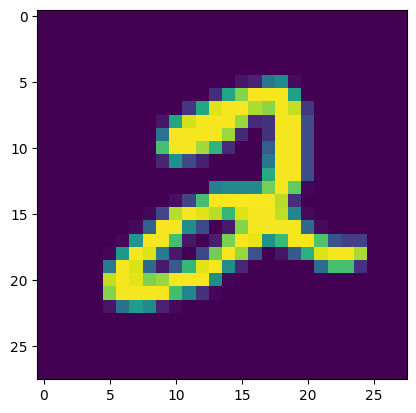

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
plt.imshow(X_train[5])
plt.show()

In [7]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
accuracy = model.evaluate(X_test, y_test)

Epoch 1/5
1688/1688 [==============================] - 18s 10ms/step - loss: 0.2539 - accuracy: 0.9240 - val_loss: 0.1185 - val_accuracy: 0.9670
Epoch 2/5
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1066 - accuracy: 0.9675 - val_loss: 0.0814 - val_accuracy: 0.9765
Epoch 3/5
1688/1688 [==============================] - 19s 12ms/step - loss: 0.0740 - accuracy: 0.9768 - val_loss: 0.0862 - val_accuracy: 0.9742
Epoch 4/5
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0737 - val_accuracy: 0.9810
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0834 - accuracy: 0.9760
0.9760000109672546


In [10]:
from PIL import Image
img = Image.open('input_image.png')
img = img.resize((28, 28))
img = img.convert('L')
np_img = np.array([np.array(img)])
prediction = model.predict(np_img)
np.argmax(prediction)

1/1 [==============================] - 0s 69ms/step


7